**Árvores de Decisões, K-Nearest Neighbors, etc**

In [172]:
from sklearn import datasets
import pandas as pd
# esse método é utilizado para dividir o 
# conjunto de dados em grupos de treinamento e test
from sklearn.model_selection import train_test_split,KFold,cross_val_score, cross_val_predict 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sbrn
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [173]:
charsDF = pd.read_csv('./Datasets/character-predictions.csv')

In [174]:
charsDF.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [175]:
print(charsDF.shape)

(1946, 33)


In [176]:
charsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [177]:
charsDF.isnull().sum()

S.No                    0
actual                  0
pred                    0
alive                   0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [178]:
charsDF.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [179]:
charsDF.loc[charsDF['dateOfBirth'] < 0]

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
87,88,0,0,0.002,0.998,Rhaenys Targaryen,Queen,0,Valyrian,-25.0,...,NaN,0.0,1,1,35.0,1,1,0,0.277592,0
1827,1828,0,0,0.058,0.942,Visenya Targaryen,QueenDowager Queen,0,Valyrian,-28.0,...,NaN,0.0,1,1,72.0,5,1,0,0.277592,0


In [180]:
charsDF['age'].describe()

count       433.000000
mean      -1293.563510
std       19564.340993
min     -298001.000000
25%          18.000000
50%          27.000000
75%          50.000000
max         100.000000
Name: age, dtype: float64

In [181]:
charsDF.loc[lambda df: df['age'] < 0]

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
1684,1685,0,0,0.253,0.747,Doreah,NaN,0,Lysene,278279.0,...,NaN,NaN,0,0,-277980.0,0,0,0,0.110368,0
1868,1869,0,0,0.360,0.640,Rhaego,NaN,0,NaN,298299.0,...,NaN,NaN,0,0,-298001.0,6,1,0,0.167224,0


In [182]:
charsDF.loc[1684, ['age']] = 25
charsDF.loc[1868, ['age']] = 0

Média de idade dos personagens de GoT:
 36.70438799076212


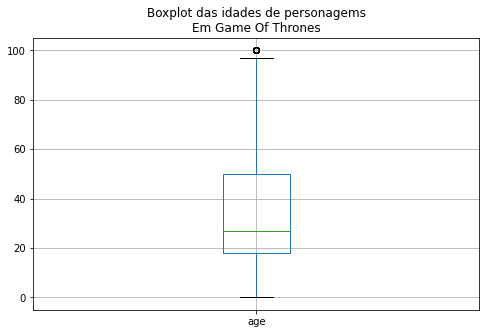

In [183]:
print('Média de idade dos personagens de GoT:\n', charsDF['age'].describe()['mean'])
plt.figure(figsize = (8,5))
charsDF.boxplot('age')
plt.title('Boxplot das idades de personagems\nEm Game Of Thrones')
plt.show()

In [184]:
nans = charsDF.isna().sum()
nans[lambda df: df > 0]

title            1008
culture          1269
dateOfBirth      1513
DateoFdeath      1502
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

In [185]:
# Vamos substituir os campos de str que estão NaN com ''
# e os booleanos por -1
charsDF.loc[lambda df: df['title'].isna(), 'title'] = ''
charsDF.loc[lambda df: df['culture'].isna(), 'culture'] = ''
charsDF['age'].fillna(charsDF['age'].mean(), inplace = True)
charsDF.fillna(value = -1, inplace = True)

In [186]:
charsDF.isnull().sum()

S.No                 0
actual               0
pred                 0
alive                0
plod                 0
name                 0
title                0
male                 0
culture              0
dateOfBirth          0
DateoFdeath          0
mother               0
father               0
heir                 0
house                0
spouse               0
book1                0
book2                0
book3                0
book4                0
book5                0
isAliveMother        0
isAliveFather        0
isAliveHeir          0
isAliveSpouse        0
isMarried            0
isNoble              0
age                  0
numDeadRelations     0
boolDeadRelations    0
isPopular            0
popularity           0
isAlive              0
dtype: int64

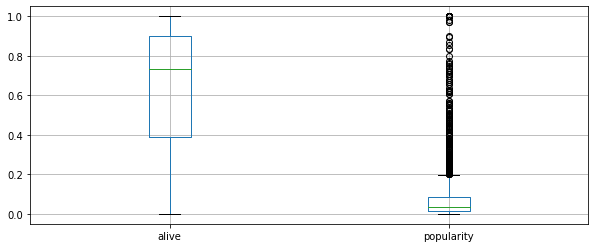

In [187]:
plt.figure(figsize = (10,4))
charsDF.boxplot(['alive','popularity'])

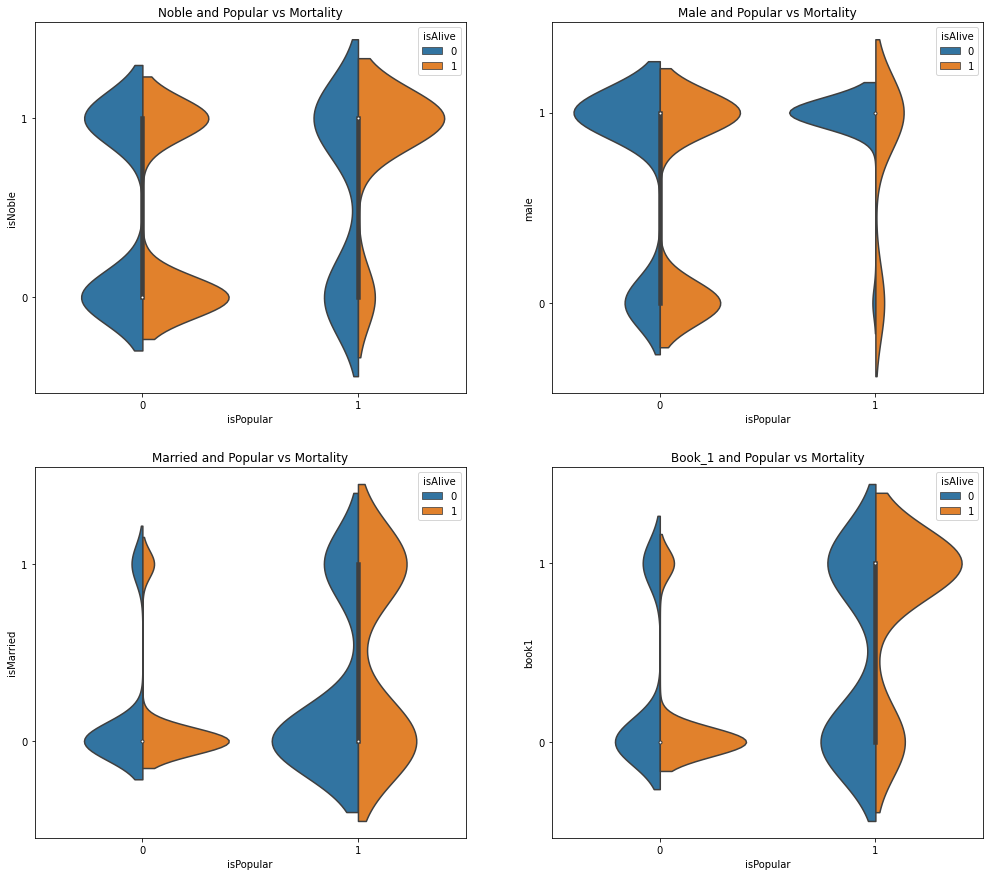

In [188]:
import warnings
warnings.filterwarnings('ignore')
f, ax = plt.subplots(2, 2, figsize = (17,15))
sbrn.violinplot("isPopular", "isNoble", hue="isAlive", data = charsDF, split=True, ax=ax[0, 0])
ax[0, 0].set_title('Noble and Popular vs Mortality')
ax[0, 0].set_yticks(range(2))

sbrn.violinplot("isPopular", "male", hue="isAlive", data = charsDF, split=True, ax=ax[0, 1])
ax[0, 1].set_title('Male and Popular vs Mortality')
ax[0, 1].set_yticks(range(2))

sbrn.violinplot("isPopular", "isMarried", hue="isAlive", data = charsDF, split=True, ax=ax[1, 0])
ax[1, 0].set_title('Married and Popular vs Mortality')
ax[1, 0].set_yticks(range(2))

sbrn.violinplot("isPopular", "book1", hue="isAlive", data = charsDF, split=True, ax=ax[1, 1])
ax[1, 1].set_title('Book_1 and Popular vs Mortality')
ax[1, 1].set_yticks(range(2))

plt.show()

In [190]:
# Para fazer nossa análise, vamos retirar algumas colunas do Banco de Dados original
drop = ["S.No", "pred", "alive", "plod", "name", "isAlive", "DateoFdeath"]
charsDF.drop(drop, inplace=True, axis=1)

#Salvando uma cópia do dataset para aplicar o One hot encoder
cpChars = charsDF.copy(deep=True)

In [213]:
charsDF = pd.get_dummies(charsDF)

In [214]:
charsDF.head()

,actual,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,...,spouse_Walton Frey,spouse_Whalen Frey,spouse_Willam Dustin,spouse_Wylis Manderly,spouse_Wynafrei Whent,spouse_Yandry,spouse_Ynys Yronwood,spouse_Ysilla,spouse_Ysilla Royce,spouse_Zhoe Blanetree
0,0,1,-1.0,0,0,0,0,0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,208.0,1,1,1,1,1,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,-1.0,0,0,0,1,0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,82.0,0,0,0,0,0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,276.0,0,0,0,1,0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
# Estamos pegando todos os dados das colunas 1(título) pra frente
x = charsDF.iloc[:,1:].values
# Todos os dados da coluna 0(actual (parece indicar se o personagem de fato morreu ou não) )
y = charsDF.iloc[:,0].values

In [216]:
# Definindo como utilizaremos o K-fold, decidindo dividir qualquer set
# em 5 partes, embaralhando os dados nessas partes com um índice de aleatoriedade 42
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [217]:
# Aqui temos uma lista de 5 modelos de análise diferentes
modelos = [LogisticRegression(solver='liblinear'), RandomForestClassifier(n_estimators=400, random_state=42), 
          DecisionTreeClassifier(random_state=42), svm.SVC(kernel='rbf', gamma='scale', random_state=42), 
          KNeighborsClassifier()]

In [218]:
#utilizando a validação cruzada
mean=[]
std=[]

**Para cada modelo na lista**, estamos avaliando pedaços do dataset (x, y)  
utilizando a estratégia de avaliação K-Fold (i.e. , vamos dividir  
o set de acordo com as regras do nosso kfold), utilizando a métrica de  
**precisão** e utilizando todos os processadores.  

In [ ]:
for model in modelos:
    result = cross_val_score(model, x, y, cv=kfold, scoring="accuracy", n_jobs=-1)
    mean.append(result)
    std.append(result)

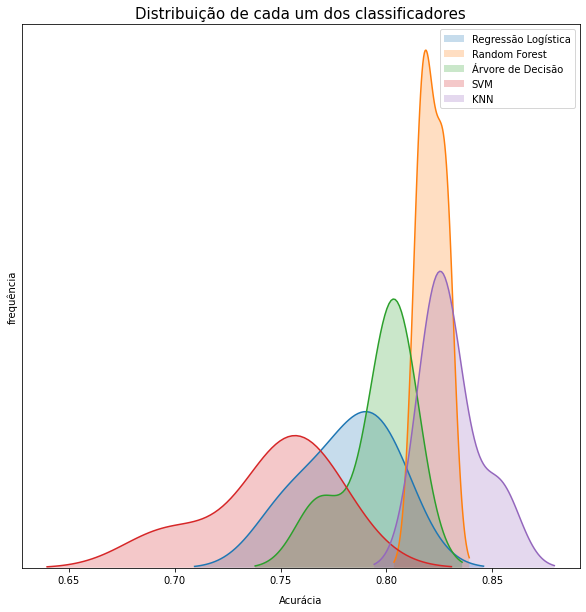

In [231]:
classificadores=['Regressão Logística', 'Random Forest', 'Árvore de Decisão', 'SVM', 'KNN']

plt.figure(figsize=(10, 10))
for i in range(len(mean)):
    sbrn.distplot(mean[i], hist= False, kde_kws={"shade": True})
    
plt.title("Distribuição de cada um dos classificadores", fontsize=15)
plt.legend(classificadores)
plt.xlabel("Acurácia", labelpad=10)
plt.yticks([])
plt.ylabel('frequência')

plt.show()

**Realizando a previsão dos classificadores**

** Quais algoritmos escollher?**

In [234]:
# Dividindo o dataset entre treinamento 80% e teste 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, 
                                                    shuffle=True, random_state=42)

In [236]:
#escolhendo o svm e a floresta randomica
svm_clf = svm.SVC(C=0.9, gamma=0.1, kernel='rbf', probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

# Treina os modelos
svm_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [237]:
# obtém as probabilidades previstas
svm_prob = svm_clf.predict_proba(x_test)
rf_prob = rf_clf.predict_proba(x_test)

# Valores reais
svm_preds = np.argmax(svm_prob, axis=1)
rf_preds = np.argmax(rf_prob, axis=1)

[Text(570.5454545454544, 0.5, 'Valor Real'), Text(0.5, 24.0, 'Previsao')]

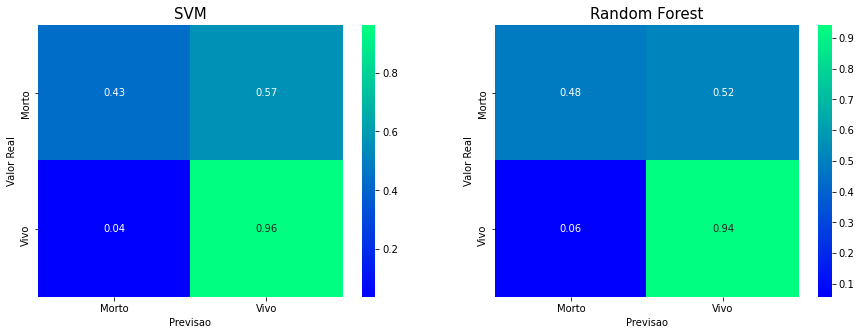

In [240]:
#analisando os modelos 
cm = metrics.confusion_matrix(y_test, svm_preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm2 = metrics.confusion_matrix(y_test, rf_preds)
cm2 = cm2.astype('float') / cm2.sum(axis=1)[: , np.newaxis]

classes = ["Morto", "Vivo"]
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title("SVM", fontsize=15.)
sbrn.heatmap(pd.DataFrame(cm, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax[0]).set(xlabel="Previsao", ylabel="Valor Real")

ax[1].set_title("Random Forest", fontsize=15.)
sbrn.heatmap(pd.DataFrame(cm2, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax[1]).set(xlabel="Previsao", 
                                                                ylabel="Valor Real")